In [2]:
%matplotlib notebook

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [58]:
def load_file(filename):
    with open(filename, 'r') as infile:
        foo = np.fromfile(infile, dtype=np.uint32)

    with open(filename, 'r') as infile:
        bar = np.fromfile(infile, dtype=np.float32)

    header = foo[:4]
    body = bar[4:]
    
    height, width, channels = header[1], header[2], header[3]
    
    return body.reshape(height, width, channels)


def get_coords(height, width):
    y, x = np.meshgrid(np.arange(0.0, width, 1.0), np.arange(0.0, height, 1.0))
    z = np.float32([0.0] * (height * width))
    z = z.reshape(height, width)
    
    return x, y, z


def subsample(x, height, width, skip=1):
    return np.expand_dims(x[::skip,::skip], -1)


def get_points(filename, skip):
    body = load_file(filename)
    body[np.isnan(body)] = 0.0
    
    h, w, c = body.shape

    x, y, z = get_coords(h, w)
    u, v, w = body[:,:,0], body[:,:,1], body[:,:,2]
    
    return body, [subsample(coord, h, w, skip) for coord in [x, y, z, u, v, w]]


def plot(x, y, z, u, v, w):
    ax = plt.figure().gca(projection='3d')
    ax.quiver(x, y, z, u, v, w)

    plt.show()

[0. 0. 0. 0.] [ 1.1488348e-05  6.6421703e-03 -6.9751404e-06  0.0000000e+00]
[ 1.9458532e-05 -6.6541610e-03 -4.2030215e-04  0.0000000e+00] [ 4.7367957e-05 -6.6549992e-03 -2.9732287e-04  0.0000000e+00]
(600, 800, 4)
8604.427


<IPython.core.display.Javascript object>


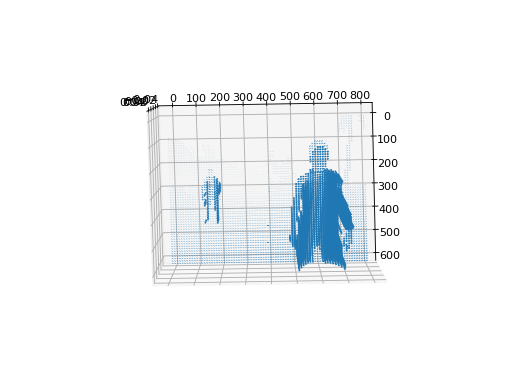

In [59]:
import os
import glob

# cur_pos
gtadir = '/mnt/d/games/Grand Theft Auto V/cap/'
capdir = '2018_08_07_14_21_16'
raw = '00004112_velocity.raw'

capdir = '2018_08_07_23_30_04'
raw = '00005970_velocity.raw'

filename = os.path.join(gtadir, capdir, raw)

scale = 1.
skip = 10

body, (x, y, z, u, v, w) = get_points(filename, skip)

print(body[0,0], body[0,-1])
print(body[-1,0], body[-1,-1])

body[:,:,0] = body[:,:,0] * body.shape[0]

print(body.shape)
print(body.sum())


plot(x, y, z, scale * u, scale * v, scale * w)


